<a href="https://colab.research.google.com/github/Azulalala/Image-Style-Transfer-Project/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=d036e8b21779599124aaacbac6b8f5d12963ed4c3fd64d1083028146b43bc7f8
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jeffaudi/coco-2014-dataset-for-yolov3

cp: cannot stat '/content/drive/MyDrive/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/jeffaudi/coco-2014-dataset-for-yolov3
License(s): Attribution 4.0 International (CC BY 4.0)
100% 25.0G/25.0G [05:02<00:00, 109MB/s] 
100% 25.0G/25.0G [05:02<00:00, 88.9MB/s]


In [16]:
!unzip /content/drive/MyDrive/style/Post_Impressionism_1000.zip -d /style/

Archive:  /content/drive/MyDrive/style/Post_Impressionism_1000.zip
   creating: /style/Post_Impressionism_1000/
  inflating: /style/__MACOSX/._Post_Impressionism_1000  
  inflating: /style/Post_Impressionism_1000/amrita-sher-gil_shringaar-1940.jpg  
  inflating: /style/__MACOSX/Post_Impressionism_1000/._amrita-sher-gil_shringaar-1940.jpg  
  inflating: /style/Post_Impressionism_1000/moise-kisling_bouquet-of-various-flowers-1927.jpg  
  inflating: /style/__MACOSX/Post_Impressionism_1000/._moise-kisling_bouquet-of-various-flowers-1927.jpg  
  inflating: /style/Post_Impressionism_1000/salvador-dali_portrait-of-hortensia.jpg  
  inflating: /style/__MACOSX/Post_Impressionism_1000/._salvador-dali_portrait-of-hortensia.jpg  
  inflating: /style/Post_Impressionism_1000/gustave-loiseau_street-at-pont-aven.jpg  
  inflating: /style/__MACOSX/Post_Impressionism_1000/._gustave-loiseau_street-at-pont-aven.jpg  
  inflating: /style/Post_Impressionism_1000/gustave-loiseau_fog-morning-effect-1917.jpg  

In [20]:
import os
print("Files in style folder:", os.listdir('/style'))

Files in style folder: ['__MACOSX', 'Post_Impressionism_1000']


In [21]:
!rm -rf /style/__MACOSX

In [22]:
style_dataset = FolderDataset('/style/Post_Impressionism_1000', transform=transform)

In [23]:
print("Files in style folder after cleanup:", os.listdir('/style/Post_Impressionism_1000'))

Files in style folder after cleanup: ['tivadar-kosztka-csontvary_roman-bridge-at-mostar-1903.jpg', 'ilya-mashkov_still-life-with-porcelain-figures-1922.jpg', 'maurice-prendergast_spring-flowers-1904.jpg', 'raoul-dufy_standing-nude-1930.jpg', 'vincent-van-gogh_three-cicadas-1889.jpg', 'charles-reiffel_point-loma-1937.jpg', 'ilya-mashkov_landscape-1914.jpg', 'georges-seurat_the-cart-or-the-horse-hauler.jpg', 'vincent-van-gogh_still-life-with-plaster-statuette-a-rose-and-two-novels-1887.jpg', 'pablo-picasso_the-picador-1890.jpg', 'vincent-van-gogh_venus.jpg', 'vladimir-dimitrov_unknown-title-6.jpg', 'arturo-souto_portrait-of-vera-mayer-1952.jpg', 'vincent-van-gogh_blossoming-acacia-branches-1890(1).jpg', 'pierre-daura_fall-at-the-mccorkle-s-barn-1942.jpg', 'moise-kisling_bouquet-of-tulips.jpg', 'irma-stern_the-initiate-1935.jpg', 'vincent-van-gogh_still-life-with-coffee-pot-1888.jpg', 'richard-gerstl_fruit-tree-1907.jpg', 'paul-cezanne_still-life-plate-and-fruit.jpg', 'pyotr-konchalovsky_

In [26]:
import os

# 检查 COCO 数据集文件夹中的文件
coco_path = '/content/drive/MyDrive/content/coco2014/images/test2014'
print("COCO Dataset Path:", coco_path)
print("Files in COCO folder:", os.listdir(coco_path))

# 检查风格数据集文件夹中的文件
style_path = '/style/Post_Impressionism_1000'
print("Style Dataset Path:", style_path)
print("Files in Style folder:", os.listdir(style_path))

COCO Dataset Path: /content/drive/MyDrive/content/coco2014/images/test2014
Files in COCO folder: ['COCO_test2014_000000003759.jpg', 'COCO_test2014_000000002375.jpg', 'COCO_test2014_000000002354.jpg', 'COCO_test2014_000000002343.jpg', 'COCO_test2014_000000002362.jpg', 'COCO_test2014_000000002358.jpg', 'COCO_test2014_000000002340.jpg', 'COCO_test2014_000000002380.jpg', 'COCO_test2014_000000003572.jpg', 'COCO_test2014_000000003081.jpg', 'COCO_test2014_000000002670.jpg', 'COCO_test2014_000000002500.jpg', 'COCO_test2014_000000003324.jpg', 'COCO_test2014_000000002949.jpg', 'COCO_test2014_000000002773.jpg', 'COCO_test2014_000000000108.jpg', 'COCO_test2014_000000000128.jpg', 'COCO_test2014_000000001751.jpg', 'COCO_test2014_000000001702.jpg', 'COCO_test2014_000000001730.jpg', 'COCO_test2014_000000001718.jpg', 'COCO_test2014_000000001671.jpg', 'COCO_test2014_000000002200.jpg', 'COCO_test2014_000000000276.jpg', 'COCO_test2014_000000000251.jpg', 'COCO_test2014_000000001585.jpg', 'COCO_test2014_000

In [29]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

class FolderDataset(Dataset):
    """直接从文件夹中读取图像"""
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        # 遍历文件夹中的所有图像文件（只选择 jpg 和 png）
        self.image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(folder_path)
                            for f in filenames if f.endswith(('.jpg', '.png'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# 定义图像转换操作
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 创建内容和风格数据集
coco_dataset = FolderDataset('/content/drive/MyDrive/content/coco2014/images/test2014', transform=transform)
style_dataset = FolderDataset('/content/drive/MyDrive/style/Post_Impressionism_1000', transform=transform)

# 创建 DataLoader
coco_loader = DataLoader(coco_dataset, batch_size=32, shuffle=True, num_workers=4)
style_loader = DataLoader(style_dataset, batch_size=32, shuffle=True, num_workers=4)

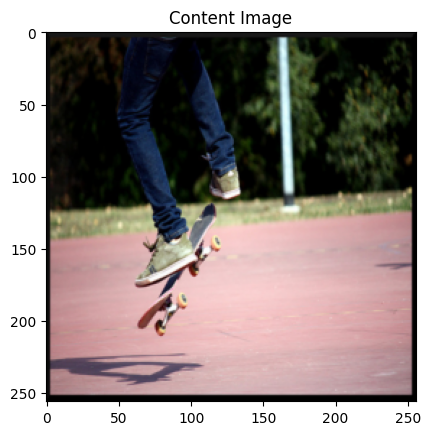

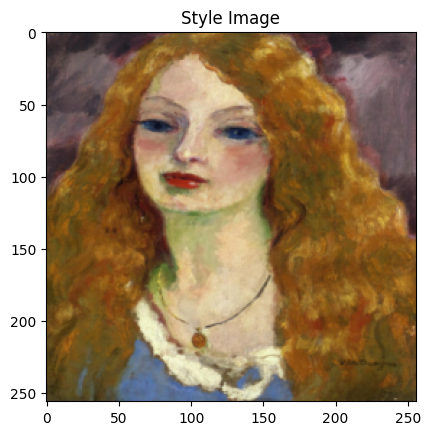

In [30]:
import matplotlib.pyplot as plt

# 获取一个批次的内容图像
content_images = next(iter(coco_loader))
style_images = next(iter(style_loader))

# 显示内容图像的第一张
plt.imshow(content_images[0].permute(1, 2, 0))
plt.title("Content Image")
plt.show()

# 显示风格图像的第一张
plt.imshow(style_images[0].permute(1, 2, 0))
plt.title("Style Image")
plt.show()